# Исследование стратегии инициализации

Инициализация центров кластеров в значительной степени влияет на результат кластеризации.
При большом количестве итераций влияние начальной инициализации снижается, если количество кластеров невеико, но все же имеется.

In [8]:
%%html
<img src = "image1.png">
<img src = "image2.png">
<img src = "image3.png">
<img src = "image4.png">

# Применимость

* Кластеризация клиентов
* Сжатие данных
* Выделение сообществ
* Факторизация

# Неприменимость

* Алгоритм неприменим к данным, для которых не определено понятие "среднего", например, категориальным данным

# Возможная стратегия выбора центров

 * Выбрать первый центроид случайным образом (среди всех точек)
 * Для каждой точки найти значение квадрата расстояния до ближайшего центроида (из тех, которые уже выбраны) dx²
* Выбрать из этих точек следующий центроид так, чтобы вероятность выбора точки была пропорциональна вычисленному для неё квадрату расстояния
    Это можно сделать следующим образом. На шаге 2 нужно параллельно с расчётом dx² подсчитывать сумму Sum(dx²). После накопления суммы найти значение Rnd=random(0.0,1.0)*Sum. Rnd случайным образом укажет на число из интервала
    от 0 до Sum, и нам остаётся только определить, какой точке это соответствует. Для этого нужно снова начать подсчитывать сумму S(dx²) до тех пор, пока сумма не превысит Rnd. Как только это случится, суммирование останавливается, и мы можем взять текущую точку в качестве центроида.
 * Повторять шаги 2 и 3 до тех пор, пока не будут найдены все необходимые центроиды. 

# Сложность алгоритма 


## (зависимость скорости настройки от размера ходных данных)

 Обозначим 
 $$\Theta _{centroid}^{d,m}$$
 временную сложность вычисления центорида кластера, число элементов которого равно m
, в d-мерном пространстве.

###### Сложность шага инициализации
k кластеров мощности m в d-мерном пространстве $$\Theta _{init}^{d,m}$$

$$ \Theta_{init}{k,d,m} = k*\Theta _{centroid}^{d,m} $$

###### Cложность шага распределения d мерных векторов по k кластерам
 $$\Theta _{distribute}^{d,m}$$

На этом шаге для каждого вектора $$ x_i\in X , i \in 1 ,... , n $$,  вычисляется $$k$$ 
 расстояний до центров кластеров $$\mu_1,...\mu_k$$
 $$ \Theta_{distribure}{k,d,m} = n*k*\Theta _{distance}^{d} $$

###### Сложность шага пересчета центров k кластеров размера m в d-мерном пространстве $$\theta _{recenter}^{k,d,m}$$

$$\theta _{recenter}^{k,d,m}  = k*\theta _{centroid}^{d,m} $$ 

###### Рассчитаем для кластера, число элементов которого равно m
$$\Theta _{centroid}^{d,m}$$ 

$$\Theta_{\rm centroid}^{d, m} = m \cdot d сложений + d делений$$

###### Рассчитаем $$\Theta_{\rm distance}^d$$

$$ \Theta_{\rm distance}^d = d вычитаний + d умножений + (d−1)сложений$$ 

###### Предположим, что алгоритм сошелся за i  итераций, тогда временная сложность алгоритма $$\Theta_{\rm k-means}^{d, n}$$

$$ \Theta_{\rm k-means}^{d, n} \le \Theta_{\rm init}^{k, d, n} + i(\Theta_{\rm distribute}^{k, d} + \Theta_{\rm recenter}^{k, d, n})$$

Операции сложения/вычитания:

$$\Theta_{\rm k-means}^{d, n} \le knd+ i(kn(2d-1) + knd) = knd+ i(kn(3d-1)) \thicksim O(ikdn)$$

Операции умножения/деления:

$\Theta_{\rm k-means}^{d, n} \le kd + i(knd + kd) = kd + ikd(n+1) \thicksim O(ikdn)$

Получаем, что временная сложность алгоритма k-means кластеризации n
 d-мерных векторов на k
 кластеров за i
 итераций:

 $$\Theta_{\rm k-means}^{d, n} \thicksim O(ikdn)$$

# Эвристика для визуализации матрицы попарных расстояний

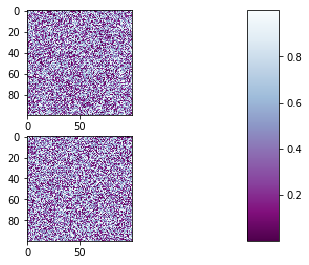

In [21]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)


plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

###### Т.е для визуализации матрицы расстояний удобно , например, по вертикальной и горизонтальной осм откладывать элементы, а цветом обозначать велиину расстояния. получится симметричный график.